<a href="https://colab.research.google.com/github/YelisettyRahul/Face-mask-Detection-using-tensor-flow/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 159M/163M [00:01<00:00, 175MB/s]
100% 163M/163M [00:01<00:00, 157MB/s]


In [5]:
from zipfile import  ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [6]:
!ls


data  drive  face-mask-dataset.zip  images.jpeg  kaggle.json  sample_data


In [7]:
importing the dependencies



SyntaxError: ignored

importing the dependencies

cv2 ----->/*( image processing  and all the related task regarding the images)*/

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import cv2 
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [9]:
with_mask = os.listdir('/content/data/with_mask')
print(with_mask[0:5])
print(with_mask[-5:])

['with_mask_3316.jpg', 'with_mask_984.jpg', 'with_mask_1480.jpg', 'with_mask_1935.jpg', 'with_mask_1688.jpg']
['with_mask_3026.jpg', 'with_mask_2591.jpg', 'with_mask_2271.jpg', 'with_mask_2939.jpg', 'with_mask_754.jpg']


In [10]:
without_mask = os.listdir('/content/data/without_mask')
print(without_mask[0:5])
print(without_mask[-5:])

['without_mask_1835.jpg', 'without_mask_2695.jpg', 'without_mask_3728.jpg', 'without_mask_2566.jpg', 'without_mask_400.jpg']
['without_mask_1778.jpg', 'without_mask_1842.jpg', 'without_mask_3121.jpg', 'without_mask_947.jpg', 'without_mask_3294.jpg']


In [11]:
print("number of images with mask :" ,len(with_mask))
print("number of images with without mask :" ,len(without_mask))

number of images with mask : 3725
number of images with without mask : 3828


creating labels for two class of images

where with mask -----------------------> 1
without mask ------------------->0 

In [12]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [13]:
print(with_mask_labels[0:5]);
print(without_mask_labels[0:5]);

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
labels = with_mask_labels+without_mask_labels;


In [15]:
print(len(labels));
print(labels[0:5]);
print(labels[-5:]);

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


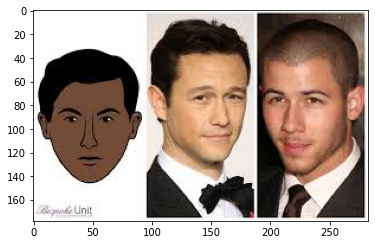

In [16]:
image =mpimg.imread('/content/data/without_mask/without_mask_988.jpg')
imgplot = plt.imshow(image)
plt.show()


convert the images to arrays and then convert into plot using numpy
 hen plot the image using imgplt

In [17]:
with_mask_path ='/content/data/with_mask/'

data=[]

for image_file in with_mask:
  image = Image.open(with_mask_path+image_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)

  data.append(image)


  without_mask_path ='/content/data/without_mask/'

for image_file in without_mask:
  image = Image.open(without_mask_path+image_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)

  data.append(image)


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
data[0]

array([[[137, 131, 135],
        [141, 135, 139],
        [144, 138, 142],
        ...,
        [ 35,  35,  36],
        [ 33,  33,  33],
        [ 31,  31,  30]],

       [[139, 133, 137],
        [143, 137, 141],
        [146, 140, 144],
        ...,
        [ 35,  35,  36],
        [ 33,  33,  33],
        [ 31,  31,  30]],

       [[139, 133, 137],
        [142, 136, 140],
        [145, 139, 143],
        ...,
        [ 36,  36,  37],
        [ 34,  34,  34],
        [ 32,  32,  30]],

       ...,

       [[ 31,  33,  32],
        [ 33,  35,  34],
        [ 39,  40,  40],
        ...,
        [ 79,  54,  42],
        [ 85,  58,  49],
        [ 87,  58,  49]],

       [[ 28,  30,  29],
        [ 29,  31,  30],
        [ 32,  34,  33],
        ...,
        [ 88,  60,  50],
        [ 95,  63,  54],
        [103,  69,  59]],

       [[ 27,  29,  28],
        [ 27,  29,  28],
        [ 29,  31,  30],
        ...,
        [101,  74,  63],
        [106,  74,  65],
        [111,  77,  68]]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
#converting image list and labels to numpy

In [24]:
x =np.array(data)
y =np.array(labels)

In [25]:
type(x)

numpy.ndarray

In [26]:
type(y)

numpy.ndarray

In [27]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(y)

[1 1 1 ... 0 0 0]


Train test split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
print(y.shape,y_train.shape,y_test.shape)

(7553,) (6042,) (1511,)


In [32]:
#scaling the data 

x_train_scaled=x_train/255

x_test_scaled=x_test/255

In [33]:
x_train[5]


array([[[ 83,  77,  89],
        [ 81,  75,  87],
        [ 80,  74,  86],
        ...,
        [233, 206, 176],
        [225, 198, 168],
        [230, 203, 173]],

       [[ 88,  82,  94],
        [ 82,  76,  88],
        [ 84,  78,  90],
        ...,
        [233, 206, 176],
        [225, 198, 168],
        [232, 205, 175]],

       [[ 92,  86,  98],
        [ 89,  83,  95],
        [ 93,  87,  99],
        ...,
        [234, 207, 177],
        [232, 205, 175],
        [235, 208, 178]],

       ...,

       [[169, 116, 112],
        [164, 110, 108],
        [167, 112, 112],
        ...,
        [101, 122, 142],
        [ 96, 118, 139],
        [ 99, 118, 143]],

       [[166, 107, 106],
        [162, 102, 102],
        [160, 101, 100],
        ...,
        [ 98, 120, 142],
        [ 94, 117, 140],
        [ 99, 120, 145]],

       [[155,  87,  92],
        [154,  88,  89],
        [156,  93,  89],
        ...,
        [ 98, 120, 147],
        [100, 124, 150],
        [103, 126, 150]]

In [34]:
x_train_scaled[5]

array([[[0.3254902 , 0.30196078, 0.34901961],
        [0.31764706, 0.29411765, 0.34117647],
        [0.31372549, 0.29019608, 0.3372549 ],
        ...,
        [0.91372549, 0.80784314, 0.69019608],
        [0.88235294, 0.77647059, 0.65882353],
        [0.90196078, 0.79607843, 0.67843137]],

       [[0.34509804, 0.32156863, 0.36862745],
        [0.32156863, 0.29803922, 0.34509804],
        [0.32941176, 0.30588235, 0.35294118],
        ...,
        [0.91372549, 0.80784314, 0.69019608],
        [0.88235294, 0.77647059, 0.65882353],
        [0.90980392, 0.80392157, 0.68627451]],

       [[0.36078431, 0.3372549 , 0.38431373],
        [0.34901961, 0.3254902 , 0.37254902],
        [0.36470588, 0.34117647, 0.38823529],
        ...,
        [0.91764706, 0.81176471, 0.69411765],
        [0.90980392, 0.80392157, 0.68627451],
        [0.92156863, 0.81568627, 0.69803922]],

       ...,

       [[0.6627451 , 0.45490196, 0.43921569],
        [0.64313725, 0.43137255, 0.42352941],
        [0.65490196, 0

Building a convolution neural network(cnn)

In [35]:
import tensorflow as tf
from tensorflow import keras


In [36]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))

model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))

model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


#compiler the neural network

In [37]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['acc'])


In [38]:
#training the neural network

data_storage = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)


Epoch 1/5
170/170 [==============================] - 15s 24ms/step - loss: 0.5085 - acc: 0.7662 - val_loss: 0.3321 - val_acc: 0.8645
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.3006 - acc: 0.8821 - val_loss: 0.2778 - val_acc: 0.8810
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2458 - acc: 0.9007 - val_loss: 0.2529 - val_acc: 0.8909
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2123 - acc: 0.9170 - val_loss: 0.2543 - val_acc: 0.9008
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1812 - acc: 0.9347 - val_loss: 0.2500 - val_acc: 0.9107


Model Evaluation

In [39]:
loss,accuracy =model.evaluate(x_test_scaled,y_test)
print('test accuracy=',accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2479 - acc: 0.9107
test accuracy= 0.9106552004814148


loss = what is the difference between your true value and predicted value

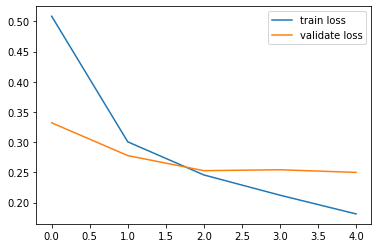

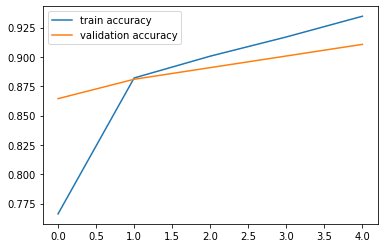

In [40]:
h=data_storage

#plot the loss value

plt.plot(h.history['loss'],label="train loss")
plt.plot(h.history['val_loss'],label="validate loss")
plt.legend()
plt.show()

#plot the accuracy values
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label="validation accuracy")
plt.legend()
plt.show()



predictive system  

path of the image : /content/Carithers-Pediatrics_Face-Mask-Facts-for-Kids.jpeg


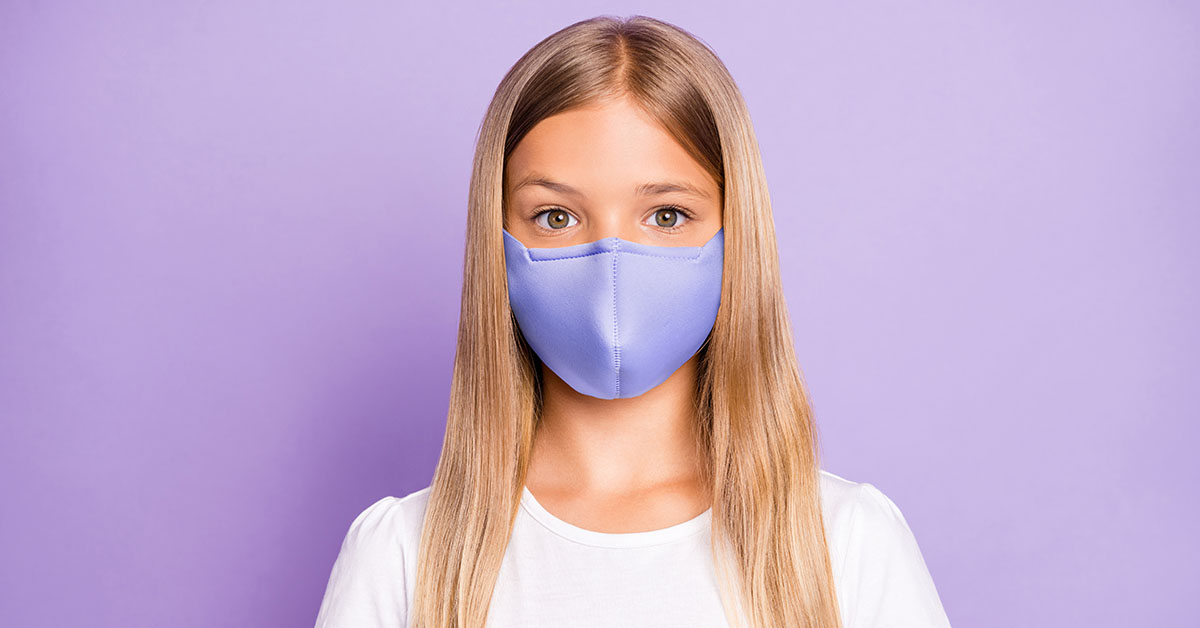

1/1 [==============================] - 0s 36ms/step
[[0.5347769  0.31902584]]
0
the person is wearing the mask


In [44]:
input_image_path = input('path of the image : ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized= cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshape = np.reshape(input_image_scaled,[1,128,128,3])
#1 is for telling the model that we are predicting only one image

input_prediction = model.predict(input_image_reshape)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==1:
  print("The person is not wearing the mask")
else:
  print("the person is wearing the mask")